In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_banknote_authentication.txt')
df = df.rename(columns={'3.6216' : 'col1', '8.6661' : 'col2', '-2.8073' : 'col3', '-0.44699' : 'col4', '0': 'class'})
df

,col1,col2,col3,col4,class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
import numpy as np
df_np = df.to_numpy()
x=df_np[:,0:-1]
y=df_np[:,-1]

In [ ]:
print(x[:10])
print(f'y = {y[:10]}')

[[ 4.5459   8.1674  -2.4586  -1.4621 ]
 [ 3.866   -2.6383   1.9242   0.10645]
 [ 3.4566   9.5228  -4.0112  -3.5944 ]
 [ 0.32924 -4.4552   4.5718  -0.9888 ]
 [ 4.3684   9.6718  -3.9606  -3.1625 ]
 [ 3.5912   3.0129   0.72888  0.56421]
 [ 2.0922  -6.81     8.4636  -0.60216]
 [ 3.2032   5.7588  -0.75345 -0.61251]
 [ 1.5356   9.1772  -2.2718  -0.73535]
 [ 1.2247   8.7779  -2.2135  -0.80647]]
y = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import collections
collections.Counter(y)

Counter({0.0: 761, 1.0: 610})

In [ ]:
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((959, 4), (959,), (412, 4), (412,))

In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

# inizializziamo il metodo con n_neighbors=5
neigh = KNeighborsClassifier(n_neighbors=5)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predictknn = neigh.predict(X_test)

print(f'dati predetti dal metodo =                {predictknn[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                [0. 0. 0. 0. 1. 1. 0. 1. 1. 1.]
dati reali presenti nel dataset di test = [0. 0. 0. 0. 1. 1. 0. 1. 1. 1.]


In [ ]:
!pip install mlxtend

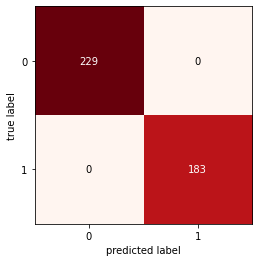

In [ ]:
# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predictknn), cmap=plt.cm.Reds)
plt.show()

In [ ]:
print(classification_report(y_test, predictknn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       229
         1.0       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predictdt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predictdt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 0. 0. 0. 1. 1. 0. 1. 1. 1.]
dati reali presenti nel dataset di test = [0. 0. 0. 0. 1. 1. 0. 1. 1. 1.]


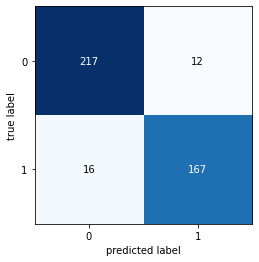

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predictdt))
plt.show()

In [ ]:
print(classification_report(y_test, predictdt))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       229
         1.0       0.93      0.91      0.92       183

    accuracy                           0.93       412
   macro avg       0.93      0.93      0.93       412
weighted avg       0.93      0.93      0.93       412



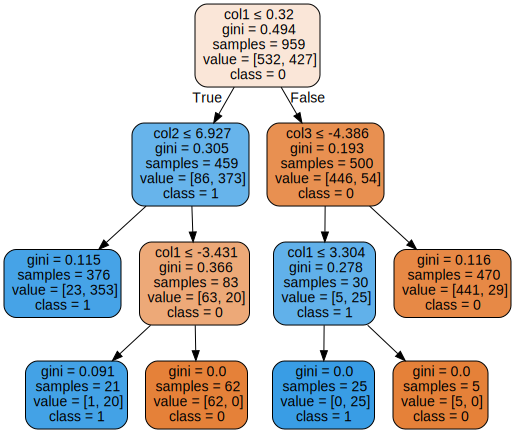

In [ ]:
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:4],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph